### Loading in the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset for EDA

In [2]:
df = pd.read_csv("credit dataset.csv", header=1)
pd.set_option('display.max_columns', None)
df

,ID,LIMIT,SEX,EDUCATION,MARITAL,AGE,Sep-05,Aug-05,Jul-05,Jun-05,May-05,Apr-05,BILL Sept 2005,BILL Aug 2005,BILL July 2005,BILL June 2005,BILL May 2005,BILL Apr 2005,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,230000,2,2,2,27,0,2,1,1,1,1,112,2709,1695,1696,237,1041,8,1092,1896,234,1047,2756,0
1,2,210000,1,1,2,35,0,0,2,8,2,8,3900,2726,27868,24069,13020,2702,2718,18000,16305,3000,3737,4202,0
2,3,500000,2,1,1,47,0,0,1,1,1,1,9915,31191,8705,2955,1004,3499,30963,7705,2186,1008,4492,6254,0
3,4,50000,1,3,1,57,0,0,0,0,0,8,10365,12619,12182,13157,17554,10091,3000,2004,2000,4000,2500,2000,0
4,5,470000,1,1,2,28,0,0,0,0,0,8,250817,474341,467273,429187,409086,403689,19000,36000,17000,15000,13000,17000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67453,67454,120000,2,1,2,29,0,0,0,2,0,0,10743,14485,19756,8465,9135,0,2200,2700,0,0,0,546,1
67454,67455,300000,1,1,1,40,1,2,2,2,2,2,0,0,0,0,3,0,0,0,0,1,0,0,0
67455,67456,240000,2,3,1,47,4,2,2,2,2,2,30222,42319,24093,3063,1940,0,42340,22119,4251,1898,0,0,0
67456,67457,80000,2,3,1,45,0,0,0,0,1,0,28900,18124,17391,87,20379,17748,1578,1735,6000,29757,1000,741,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67458 entries, 0 to 67457
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          67458 non-null  int64
 1   LIMIT                       67458 non-null  int64
 2   SEX                         67458 non-null  int64
 3   EDUCATION                   67458 non-null  int64
 4   MARITAL                     67458 non-null  int64
 5   AGE                         67458 non-null  int64
 6   Sep-05                      67458 non-null  int64
 7   Aug-05                      67458 non-null  int64
 8   Jul-05                      67458 non-null  int64
 9   Jun-05                      67458 non-null  int64
 10  May-05                      67458 non-null  int64
 11  Apr-05                      67458 non-null  int64
 12  BILL Sept 2005              67458 non-null  int64
 13  BILL Aug 2005               67458 non-null  int64
 14  BILL J

In [4]:
df.isnull().sum()

ID                            0
LIMIT                         0
SEX                           0
EDUCATION                     0
MARITAL                       0
AGE                           0
Sep-05                        0
Aug-05                        0
Jul-05                        0
Jun-05                        0
May-05                        0
Apr-05                        0
BILL Sept 2005                0
BILL Aug 2005                 0
BILL July 2005                0
BILL June 2005                0
BILL May 2005                 0
BILL Apr 2005                 0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

##### We can clearly see that there are no missing values in the dataset, so no treatment for the same is required.

In [5]:
# df['MARITAL'].value_counts()

#Error Faced in the above code. To fix the error, following procedure was followed: 
df.columns = df.columns.str.strip()

df['MARITAL'].value_counts()

2    35284
1    31264
3      775
0      135
Name: MARITAL, dtype: int64

##### As it is unclear what the 0 was for, as was not given in the dataset nor the query about dataset was resolved in time, the 0 value is merged with others for analytical purposes

In [6]:
# Change 0 values in 'MARRIAGE' column to 3 for the entire DataFrame
df.replace({'MARITAL': {0: 3}}, inplace=True)
df['MARITAL'].value_counts()

2    35284
1    31264
3      910
Name: MARITAL, dtype: int64

## Preparing the Data for Analysis

In [7]:
# Changing the names of the columns for feasiblity
new_column_names = {'BILL Sept 2005': 'BILL_Sept_2005',
                    'BILL Aug 2005': 'BILL_Aug_2005',
                    'BILL July 2005': 'BILL_July_2005',
                    'BILL June 2005': 'BILL_June_2005',
                    'BILL May 2005': 'BILL_May_2005',
                    'BILL Apr 2005': 'BILL_Apr_2005',
                    'default payment next month': 'default_payment_next_month'}

# Rename the columns
df = df.rename(columns=new_column_names)

df

,ID,LIMIT,SEX,EDUCATION,MARITAL,AGE,Sep-05,Aug-05,Jul-05,Jun-05,May-05,Apr-05,BILL_Sept_2005,BILL_Aug_2005,BILL_July_2005,BILL_June_2005,BILL_May_2005,BILL_Apr_2005,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,230000,2,2,2,27,0,2,1,1,1,1,112,2709,1695,1696,237,1041,8,1092,1896,234,1047,2756,0
1,2,210000,1,1,2,35,0,0,2,8,2,8,3900,2726,27868,24069,13020,2702,2718,18000,16305,3000,3737,4202,0
2,3,500000,2,1,1,47,0,0,1,1,1,1,9915,31191,8705,2955,1004,3499,30963,7705,2186,1008,4492,6254,0
3,4,50000,1,3,1,57,0,0,0,0,0,8,10365,12619,12182,13157,17554,10091,3000,2004,2000,4000,2500,2000,0
4,5,470000,1,1,2,28,0,0,0,0,0,8,250817,474341,467273,429187,409086,403689,19000,36000,17000,15000,13000,17000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67453,67454,120000,2,1,2,29,0,0,0,2,0,0,10743,14485,19756,8465,9135,0,2200,2700,0,0,0,546,1
67454,67455,300000,1,1,1,40,1,2,2,2,2,2,0,0,0,0,3,0,0,0,0,1,0,0,0
67455,67456,240000,2,3,1,47,4,2,2,2,2,2,30222,42319,24093,3063,1940,0,42340,22119,4251,1898,0,0,0
67456,67457,80000,2,3,1,45,0,0,0,0,1,0,28900,18124,17391,87,20379,17748,1578,1735,6000,29757,1000,741,0


## Working out few calculations so that the analysis step can be more easier. 


By creating the calculated column I can much easily gather insights on the dataset of multiple columns at once by basic 
filtering. Such calculated columns can also be very helpful in understanding the correlation and makes the analysis process
much faster.

In [8]:
#Selecting the columns according to quarters for analytical purposes

columns_to_sum_q2 = ['Jun-05', 'May-05', 'Apr-05']
columns_to_sum_q3 = ['Sep-05', 'Aug-05', 'Jul-05']

# Calculating the sum of the selected columns
df['repay_status_q2'] = df[columns_to_sum_q2].sum(axis=1)
df['repay_status_q3'] = df[columns_to_sum_q3].sum(axis=1)

# Selecting the columns according to quarters for analytical purposes
columns_to_sum_q2 = ['BILL_June_2005', 'BILL_May_2005', 'BILL_Apr_2005']
columns_to_sum_q3 = ['BILL_Sept_2005', 'BILL_Aug_2005', 'BILL_July_2005']

# Calculating the sum of the selected columns
df['bill_statement_q2'] = df[columns_to_sum_q2].sum(axis=1)
df['bill_statement_q3'] = df[columns_to_sum_q3].sum(axis=1)

# Calculating the total amount paid
df['total_amt_paid'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

# Calculating the total outstanding
df['total_outstanding'] = df['bill_statement_q3'] + df['bill_statement_q2'] - df['total_amt_paid']

In [9]:
# Reordering the columns
df = df[['ID', 'LIMIT', 'SEX', 'EDUCATION', 'MARITAL', 'AGE', 'Sep-05', 'Aug-05', 'Jul-05', 'Jun-05', 'May-05', 'Apr-05',
         'repay_status_q2', 'repay_status_q3','BILL_Sept_2005', 'BILL_Aug_2005', 'BILL_July_2005', 'BILL_June_2005', 
         'BILL_May_2005', 'BILL_Apr_2005', 'bill_statement_q2', 'bill_statement_q3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
         'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'total_amt_paid', 'total_outstanding', 'default_payment_next_month']]

df

,ID,LIMIT,SEX,EDUCATION,MARITAL,AGE,Sep-05,Aug-05,Jul-05,Jun-05,May-05,Apr-05,repay_status_q2,repay_status_q3,BILL_Sept_2005,BILL_Aug_2005,BILL_July_2005,BILL_June_2005,BILL_May_2005,BILL_Apr_2005,bill_statement_q2,bill_statement_q3,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,total_amt_paid,total_outstanding,default_payment_next_month
0,1,230000,2,2,2,27,0,2,1,1,1,1,3,3,112,2709,1695,1696,237,1041,2974,4516,8,1092,1896,234,1047,2756,7033,457,0
1,2,210000,1,1,2,35,0,0,2,8,2,8,18,2,3900,2726,27868,24069,13020,2702,39791,34494,2718,18000,16305,3000,3737,4202,47962,26323,0
2,3,500000,2,1,1,47,0,0,1,1,1,1,3,1,9915,31191,8705,2955,1004,3499,7458,49811,30963,7705,2186,1008,4492,6254,52608,4661,0
3,4,50000,1,3,1,57,0,0,0,0,0,8,8,0,10365,12619,12182,13157,17554,10091,40802,35166,3000,2004,2000,4000,2500,2000,15504,60464,0
4,5,470000,1,1,2,28,0,0,0,0,0,8,8,0,250817,474341,467273,429187,409086,403689,1241962,1192431,19000,36000,17000,15000,13000,17000,117000,2317393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67453,67454,120000,2,1,2,29,0,0,0,2,0,0,2,0,10743,14485,19756,8465,9135,0,17600,44984,2200,2700,0,0,0,546,5446,57138,1
67454,67455,300000,1,1,1,40,1,2,2,2,2,2,6,5,0,0,0,0,3,0,3,0,0,0,0,1,0,0,1,2,0
67455,67456,240000,2,3,1,47,4,2,2,2,2,2,6,8,30222,42319,24093,3063,1940,0,5003,96634,42340,22119,4251,1898,0,0,70608,31029,0
67456,67457,80000,2,3,1,45,0,0,0,0,1,0,1,0,28900,18124,17391,87,20379,17748,38214,64415,1578,1735,6000,29757,1000,741,40811,61818,0


In [10]:
#Finding the customers which have no outstanding amount at the month of Sept.

df[df['total_outstanding'] == 0]

,ID,LIMIT,SEX,EDUCATION,MARITAL,AGE,Sep-05,Aug-05,Jul-05,Jun-05,May-05,Apr-05,repay_status_q2,repay_status_q3,BILL_Sept_2005,BILL_Aug_2005,BILL_July_2005,BILL_June_2005,BILL_May_2005,BILL_Apr_2005,bill_statement_q2,bill_statement_q3,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,total_amt_paid,total_outstanding,default_payment_next_month
91,92,260000,2,1,1,35,0,0,2,8,2,8,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
107,108,150000,2,2,1,44,1,0,2,8,2,8,18,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
153,154,30000,2,3,2,23,1,0,4,3,2,8,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
252,253,300000,2,2,1,45,1,0,2,8,2,8,18,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263,264,120000,1,3,1,42,1,0,2,8,2,8,18,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67212,67213,40000,2,1,2,25,1,2,2,2,2,2,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
67290,67291,90000,1,3,1,54,1,2,2,2,2,2,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67367,67368,100000,2,3,1,55,1,2,2,2,2,2,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
67408,67409,160000,1,1,1,40,1,2,2,2,2,2,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Filter the data based on conditions

# Count the number of individuals with total outstanding balance equal to 0 and 1
count_non_defaulters = len(df[df['default_payment_next_month'] == 0])
count_defaulters = len(df[df['default_payment_next_month'] == 1])

# Calculate the percentage of individuals with total outstanding balance equal to 0 and 1
percentage_non_defaulters = (count_non_defaulters / len(df)) * 100
percentage_defaulters = (count_defaulters / len(df)) * 100

print("Percentage of Total Non-Defaulters: {:.2f}%".format(percentage_non_defaulters))
print("Percentage of Total Defaulters: {:.2f}%".format(percentage_defaulters))

Percentage of Total Non-Defaulters: 77.65%
Percentage of Total Defaulters: 22.35%


In [12]:
no_outstanding = df[df['total_outstanding'] == 0]
no_outstanding_defaulters = df[(df['default_payment_next_month'] == 1) & (df['total_outstanding'] == 0)]
no_outstanding_non_defaulters = df[(df['default_payment_next_month'] == 0) & (df['total_outstanding'] == 0)]

no_outstanding_defaulters_count = len(no_outstanding_defaulters)
no_outstanding_defaulters_percentage = (no_outstanding_defaulters_count / len(no_outstanding)) * 100

no_outstanding_non_defaulters_count = len(no_outstanding_non_defaulters)
no_outstanding_non_defaulters_percentage = (no_outstanding_non_defaulters_count / len(no_outstanding)) * 100

print("Percentage of No Outstanding Non-Defaulters: {:.2f}%".format(no_outstanding_non_defaulters_percentage))
print("Percentage of No Outstanding Defaulters: {:.2f}%".format(no_outstanding_defaulters_percentage))

Percentage of No Outstanding Non-Defaulters: 67.40%
Percentage of No Outstanding Defaulters: 32.60%


## Beginning EDA

In [13]:
summary_stats = df[['bill_statement_q2', 'bill_statement_q3', 'total_amt_paid']].describe()
print(summary_stats)

       bill_statement_q2  bill_statement_q3  total_amt_paid
count       6.745800e+04       6.745800e+04    67458.000000
mean        1.170545e+05       1.468130e+05    26413.220107
std         1.668726e+05       2.034547e+05    38172.641929
min         0.000000e+00       0.000000e+00        0.000000
25%         1.013225e+04       1.405675e+04     6946.000000
50%         5.288400e+04       6.864600e+04    14193.000000
75%         1.489835e+05       1.919885e+05    30794.000000
max         1.580665e+06       1.787856e+06   702852.000000


### Insights

##### We can gather couple of very valuable insights from the output above, such as:
    
    1. The average bill amount in the second quarter was around 117,054, while in the third quarter, it increased to approximately 146,813. This suggests that, on average, people had higher expenses in the third quarter compared to the second quarter.
    2. The maximum bill amount of around 1.6 million and the maximum total amount paid of approximately 702,852 demonstrate that there are individuals with substantial financial obligations.

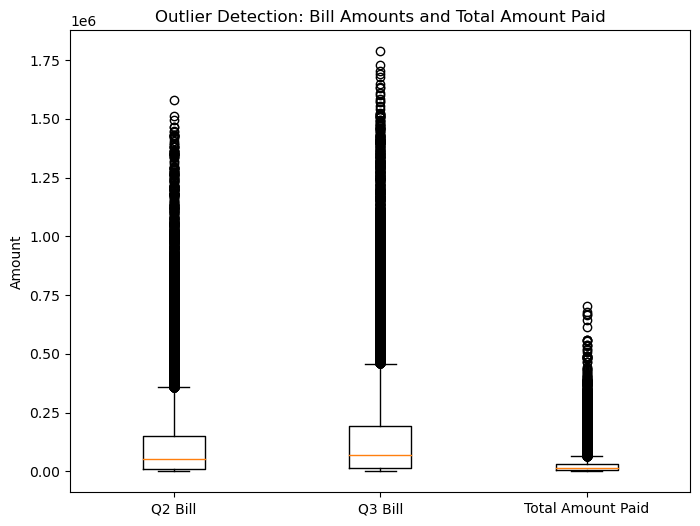

In [14]:
#Detecting outliers

plt.figure(figsize=(8, 6))
plt.boxplot([df['bill_statement_q2'], df['bill_statement_q3'], df['total_amt_paid']])
plt.xticks([1, 2, 3], ['Q2 Bill', 'Q3 Bill', 'Total Amount Paid'])
plt.ylabel('Amount')
plt.title('Outlier Detection: Bill Amounts and Total Amount Paid')
plt.show()


## Customer Spending Patterns

### 1. Identifying Top 10 Customers with Most Spendings

In [15]:
# Group the data by customer ID and calculate the sum of bill amounts
customer_spending = df.groupby('ID')['bill_statement_q2', 'bill_statement_q3'].sum()

# Calculate the total spending for each customer
customer_spending['total_spending'] = customer_spending['bill_statement_q2'] + customer_spending['bill_statement_q3']

# Optional: Sort the data based on total spending in descending order
customer_spending = customer_spending.sort_values('total_spending', ascending=False)

# Print the aggregated spending for each customer
print(customer_spending.head(10))

       bill_statement_q2  bill_statement_q3  total_spending
ID                                                         
41318            1514411            1727938         3242349
55353            1580665            1460612         3041277
24517            1464647            1574411         3039058
43618            1381303            1630801         3012104
63379            1366129            1609116         2975245
60081            1350915            1601483         2952398
25791            1425461            1513266         2938727
26296            1394999            1540828         2935827
57435            1446820            1481272         2928092
23165            1233756            1678198         2911954


C:\Users\catie\AppData\Local\Temp\ipykernel_32108\3693003164.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_spending = df.groupby('ID')['bill_statement_q2', 'bill_statement_q3'].sum()


In [16]:
# Count the number of customers who repaid their bill completely
num_complete_repayments = len(customer_spending[customer_spending['total_spending'] == 0])

# Filter the DataFrame 'df' to get rows where ID is in customer_spending
matching_df = df[df['ID'].isin(customer_spending.index)]

print("Number of customers who repaid their bill completely:", num_complete_repayments)

Number of customers who repaid their bill completely: 1698


#### It is crucial to understand that people who have completed their total outstanding by the month of September are only 1698.
##### The company needs to target the customers who are of higher spending area and focus highly on recollection

### 2. Interest group (no outstanding) based exploration of demographic data for Quarter 2

In [17]:
# Filter the DataFrame to get rows where total_outstanding is 0 and default_payment_next_month is 1
no_outstanding_defaulters = df[(df['total_outstanding'] == 0) & (df['default_payment_next_month'] == 1)]

# Select relevant columns for analysis
columns_of_interest = ['bill_statement_q2', 'bill_statement_q3', 'SEX', 'EDUCATION', 'MARITAL', 'AGE']

# Create a new DataFrame with selected columns
defaulter_details = no_outstanding_defaulters[columns_of_interest]

##### Visualising our interest group and Creating bins as there are many outliers

In [18]:
# Define the bin edges for bill statements and payments
bill_bins = [0, 50000, 100000, 150000, 200000, np.inf]
payment_bins = [0, 10000, 20000, 30000, 40000, np.inf]

# Create the bin labels
bill_labels = ['<50K', '50K-100K', '100K-150K', '150K-200K', '200K+']
payment_labels = ['<10K', '10K-20K', '20K-30K', '30K-40K', '40K+']

# Bin the bill statements and payments
df['bill_bins'] = pd.cut(df['bill_statement_q2'], bins=bill_bins, labels=bill_labels)
df['payment_bins'] = pd.cut(df['total_amt_paid'], bins=payment_bins, labels=payment_labels)

# Filter the DataFrame to get rows where total_outstanding is 0 and default_payment_next_month is 1
no_outstanding_defaulters = df[(df['total_outstanding'] == 0) & (df['default_payment_next_month'] == 1)]

# Select relevant columns for analysis
columns_of_interest = ['bill_bins', 'payment_bins', 'SEX', 'EDUCATION', 'MARITAL', 'AGE']

# Create a new DataFrame with selected columns
defaulter_details = no_outstanding_defaulters[columns_of_interest]

C:\Users\catie\AppData\Local\Temp\ipykernel_32108\595572788.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bill_bins'] = pd.cut(df['bill_statement_q2'], bins=bill_bins, labels=bill_labels)
C:\Users\catie\AppData\Local\Temp\ipykernel_32108\595572788.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment_bins'] = pd.cut(df['total_amt_paid'], bins=payment_bins, labels=payment_labels)


### Plotting the interest group 

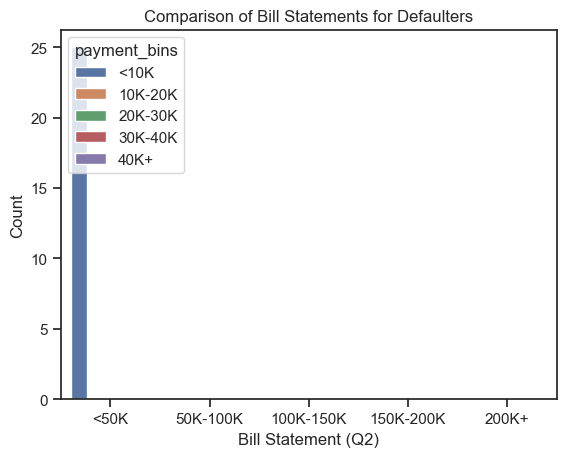

In [19]:
# Plot the comparison of bill generation quarter for defaulters
sns.set(style="ticks")
sns.countplot(x='bill_bins', data=defaulter_details, hue='payment_bins')
plt.xlabel('Bill Statement (Q2)')
plt.ylabel('Count')
plt.title('Comparison of Bill Statements for Defaulters')
plt.show()

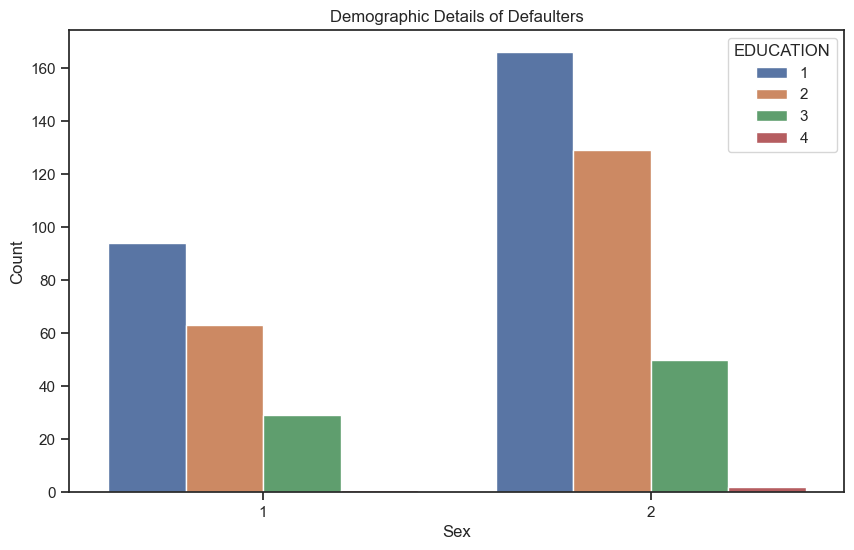

In [20]:

# Plot demographic details of defaulters
plt.figure(figsize=(10, 6))
sns.countplot(data=defaulter_details, x='SEX', hue='EDUCATION')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Demographic Details of Defaulters')
plt.show()

C:\Users\catie\AppData\Local\Temp\ipykernel_32108\2733146976.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulter_details['Age Group'] = pd.cut(defaulter_details['AGE'], bins=age_bins, labels=age_labels)


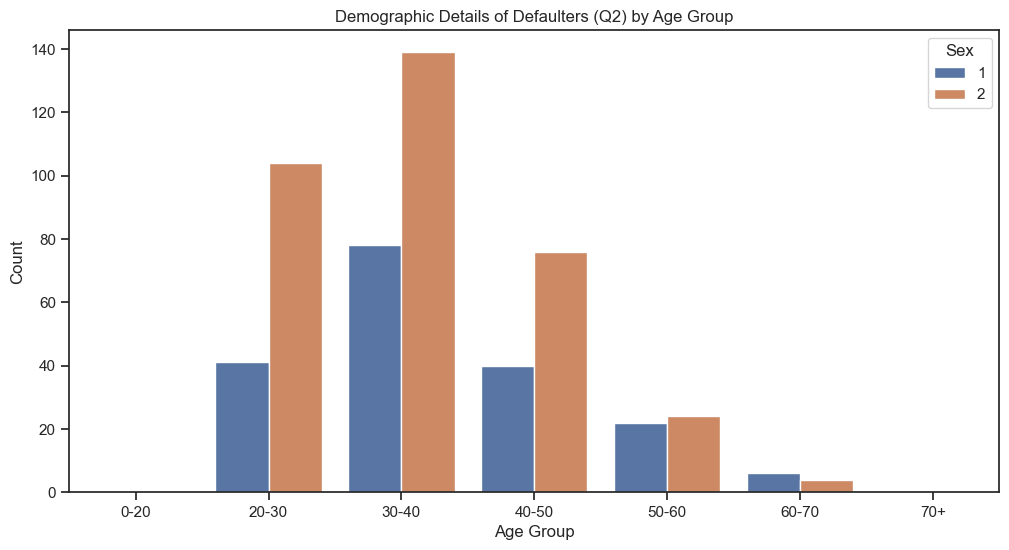

In [21]:
# Create age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 100]  # Define the age bins as per your requirement
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']

# Bin the age column
defaulter_details['Age Group'] = pd.cut(defaulter_details['AGE'], bins=age_bins, labels=age_labels)

# Plot demographic details of defaulters (Q2) by age group
plt.figure(figsize=(12, 6))
sns.countplot(data=defaulter_details, x='Age Group', hue='SEX')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Demographic Details of Defaulters (Q2) by Age Group')
plt.legend(title='Sex', loc='upper right')
plt.show()



### 3. Interest group (no outstanding) based exploration of demographic data for Quarter 3

C:\Users\catie\AppData\Local\Temp\ipykernel_32108\1703554946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bill_bins_q3'] = pd.cut(df['bill_statement_q3'], bins=bill_bins, labels=bill_labels)
C:\Users\catie\AppData\Local\Temp\ipykernel_32108\1703554946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment_bins_q3'] = pd.cut(df['total_amt_paid'], bins=payment_bins, labels=payment_labels)


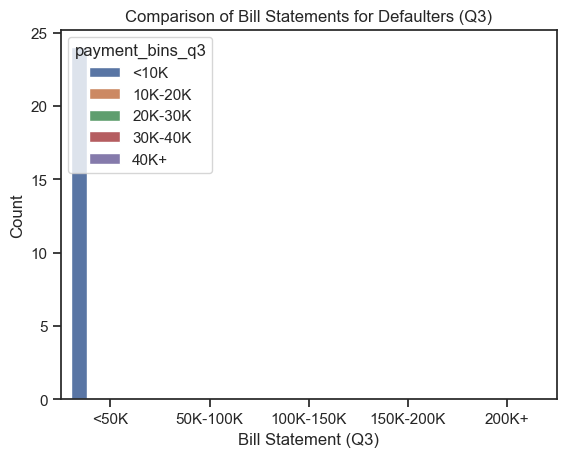

In [22]:
# Bin the bill statements and payment amounts for Quarter 3 (Q3)
df['bill_bins_q3'] = pd.cut(df['bill_statement_q3'], bins=bill_bins, labels=bill_labels)
df['payment_bins_q3'] = pd.cut(df['total_amt_paid'], bins=payment_bins, labels=payment_labels)

# Filter the DataFrame to get rows where total_outstanding is 0 and default_payment_next_month is 1 for Q3
no_outstanding_defaulters_q3 = df[(df['total_outstanding'] == 0) & (df['default_payment_next_month'] == 1)]

# Create a new DataFrame with selected columns for Q3
defaulter_details_q3 = no_outstanding_defaulters_q3[['bill_bins_q3', 'payment_bins_q3', 'SEX', 'EDUCATION', 'MARITAL', 'AGE']]

# Plot the comparison of bill generation quarter for defaulters (Q3)
sns.set(style="ticks")
sns.countplot(x='bill_bins_q3', data=defaulter_details_q3, hue='payment_bins_q3')
plt.xlabel('Bill Statement (Q3)')
plt.ylabel('Count')
plt.title('Comparison of Bill Statements for Defaulters (Q3)')
plt.show()

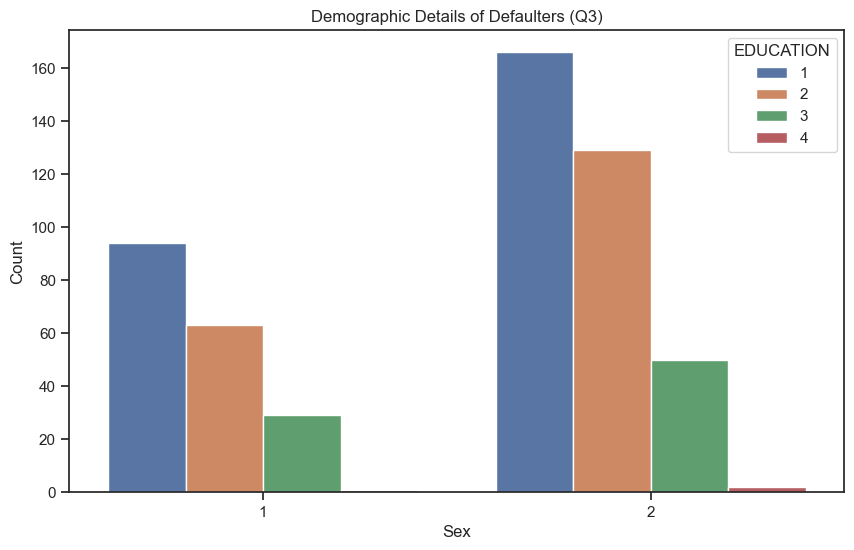

In [23]:
# Plot demographic details of defaulters (Q3)
plt.figure(figsize=(10, 6))
sns.countplot(data=defaulter_details_q3, x='SEX', hue='EDUCATION')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Demographic Details of Defaulters (Q3)')
plt.show()

C:\Users\catie\AppData\Local\Temp\ipykernel_32108\3131829608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulter_details_q3['Age Group'] = pd.cut(defaulter_details_q3['AGE'], bins=age_bins, labels=age_labels)


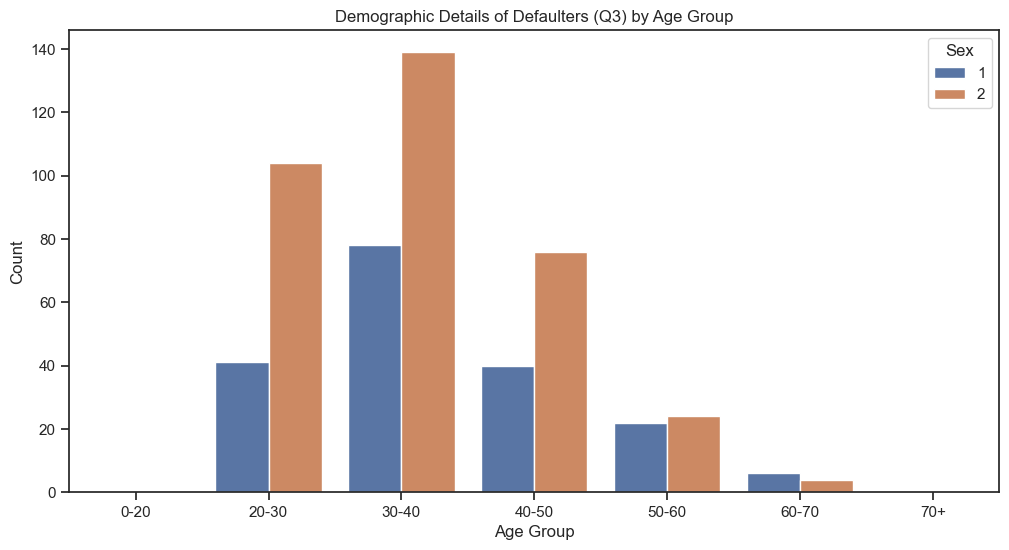

In [24]:
defaulter_details_q3['Age Group'] = pd.cut(defaulter_details_q3['AGE'], bins=age_bins, labels=age_labels)

# Plot demographic details of defaulters (Q3) by age group
plt.figure(figsize=(12, 6))
sns.countplot(data=defaulter_details_q3, x='Age Group', hue='SEX')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Demographic Details of Defaulters (Q3) by Age Group')
plt.legend(title='Sex', loc='upper right')
plt.show()

C:\Users\catie\AppData\Local\Temp\ipykernel_32108\3131829608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulter_details_q3['Age Group'] = pd.cut(defaulter_details_q3['AGE'], bins=age_bins, labels=age_labels)


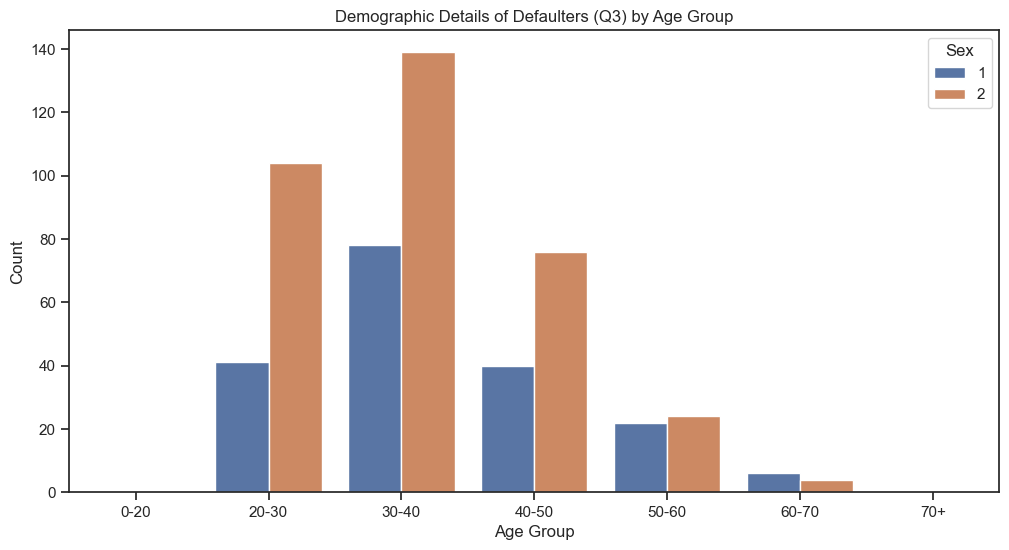

In [25]:
defaulter_details_q3['Age Group'] = pd.cut(defaulter_details_q3['AGE'], bins=age_bins, labels=age_labels)

# Plot demographic details of defaulters (Q3) by age group
plt.figure(figsize=(12, 6))
sns.countplot(data=defaulter_details_q3, x='Age Group', hue='SEX')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Demographic Details of Defaulters (Q3) by Age Group')
plt.legend(title='Sex', loc='upper right')
plt.show()

##### From the two quarters we can see with very little to no difference between the two quarters, few insights are easily gathered:
    1. Majority of the Customers in the interest group who defaulted were female graduates. 
    2. A huge chunk of the data in the same is only of the people whose bill statments were roughly below 10k for each quarter.
    3. Majority of the Customers in the interest group who defaulted were of Age 30 - 40.

## Visualisation on Total Spendings


#### Treating Outliers for More Meaningful Visualisation

In [26]:
# Calculate total spending by summing bill amounts for each customer
df['total_spending'] = df['bill_statement_q2'] + df['bill_statement_q3']

# Calculate the IQR
Q1 = df['total_spending'].quantile(0.25)
Q3 = df['total_spending'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df[(df['total_spending'] >= lower_bound) & (df['total_spending'] <= upper_bound)]


C:\Users\catie\AppData\Local\Temp\ipykernel_32108\256033253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_spending'] = df['bill_statement_q2'] + df['bill_statement_q3']


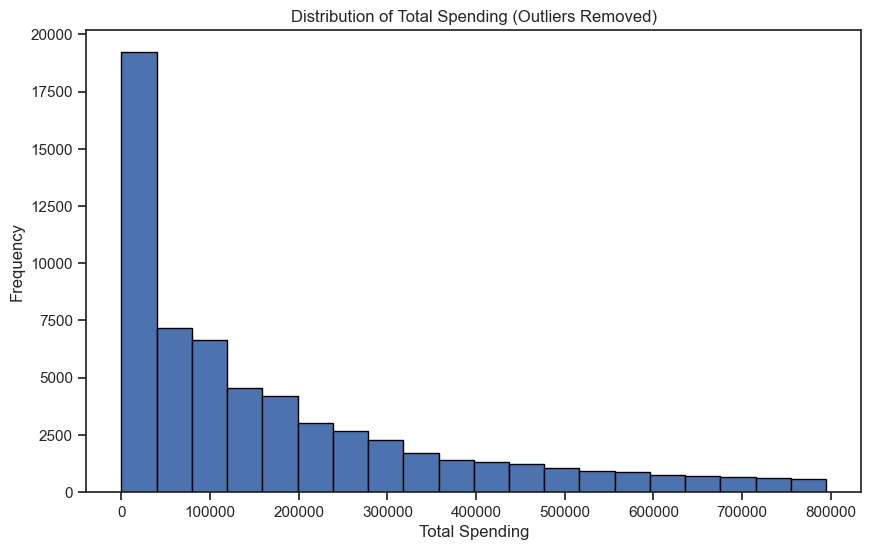

In [27]:
# Visualize the distribution of total spending using a histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['total_spending'], bins=20, edgecolor='black')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.title('Distribution of Total Spending (Outliers Removed)')
plt.show()

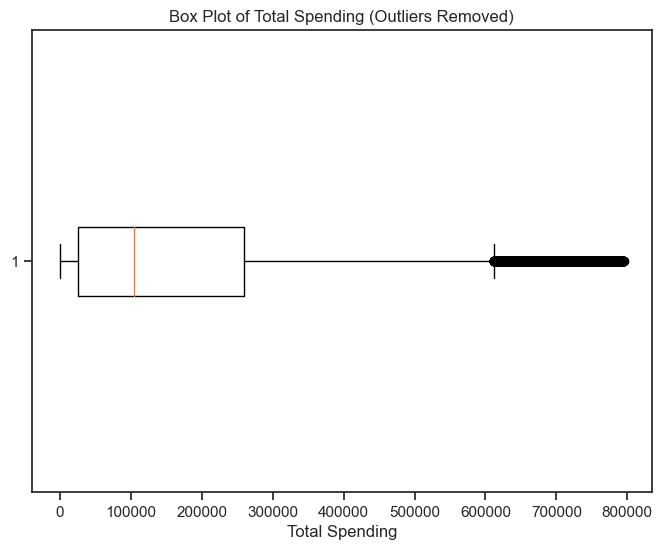

In [28]:
# Visualize the distribution of total spending using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_df['total_spending'], vert=False)
plt.xlabel('Total Spending')
plt.title('Box Plot of Total Spending (Outliers Removed)')
plt.show()

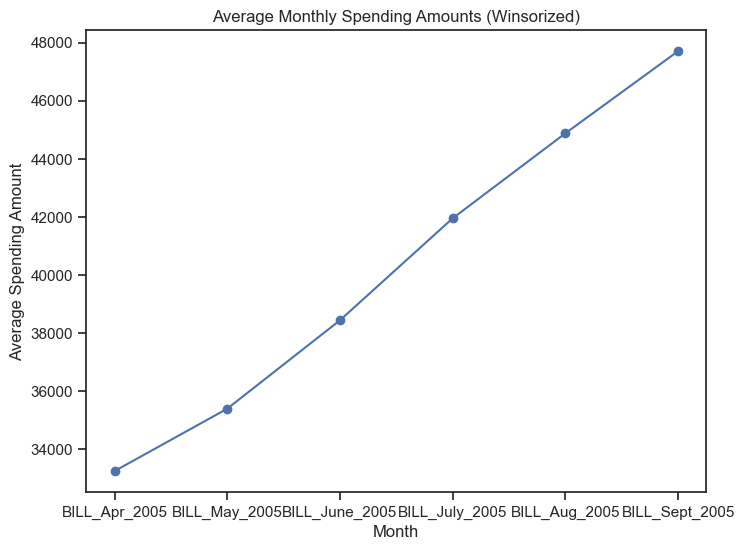

In [29]:
#A new way to treat outliers which might be more applicable here

from scipy.stats import mstats

# Apply winsorization to treat outliers in spending columns
winsorized_spending = df[['BILL_Apr_2005', 'BILL_May_2005', 'BILL_June_2005', 'BILL_July_2005', 'BILL_Aug_2005', 'BILL_Sept_2005']].apply(lambda x: mstats.winsorize(x, limits=[0.05, 0.05]))

# Calculate the average spending amounts per month
average_spending = winsorized_spending.mean()

# Plot the average spending amounts per month
plt.figure(figsize=(8, 6))
average_spending.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Spending Amount')
plt.title('Average Monthly Spending Amounts (Winsorized)')
plt.show()

##### It can clearly be seen that average monthly spending, even after dealing with the outliers, have been on the uprise. This indicates business opportunities as well as risk for the company in the coming months. 
#### More spending could lead to high amount of loan being unpaid. To understand more on this particular topic, more data is required. For the company, suggestion can be given to tighten their lending procedures in order to minimize risk with the coming opportunity.

## Visualisation of Categorical Variables

In [30]:
# Create a new DataFrame with modified categorical values
df_visualization = df.copy()
df_visualization['SEX'] = df_visualization['SEX'].replace({1: 'Male', 2: 'Female'})
df_visualization['EDUCATION'] = df_visualization['EDUCATION'].replace({1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'})
df_visualization['MARITAL'] = df_visualization['MARITAL'].replace({1: 'Married', 2: 'Single', 3: 'Others'})

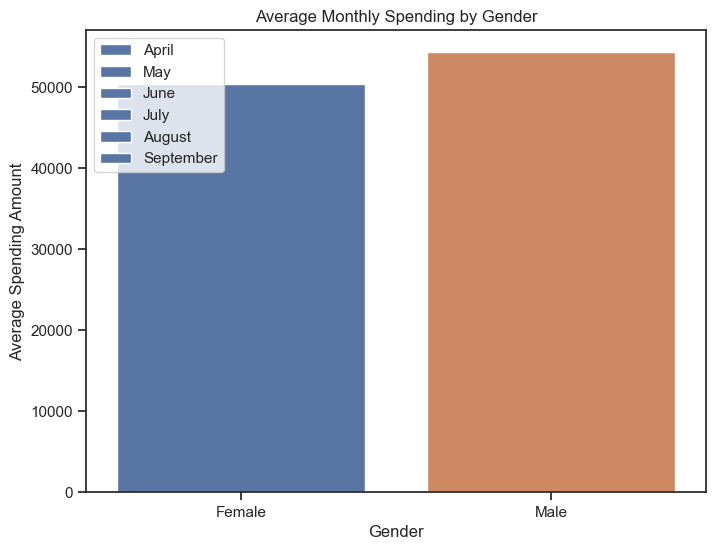

In [31]:
# Group the data by a categorical variable and calculate the average spending
grouped_spending = df_visualization.groupby('SEX')[['BILL_Apr_2005', 'BILL_May_2005', 'BILL_June_2005', 'BILL_July_2005', 'BILL_Aug_2005', 'BILL_Sept_2005']].mean()

# Plot grouped bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_spending, x=grouped_spending.index, y='BILL_Apr_2005', label='April')
sns.barplot(data=grouped_spending, x=grouped_spending.index, y='BILL_May_2005', label='May')
sns.barplot(data=grouped_spending, x=grouped_spending.index, y='BILL_June_2005', label='June')
sns.barplot(data=grouped_spending, x=grouped_spending.index, y='BILL_July_2005', label='July')
sns.barplot(data=grouped_spending, x=grouped_spending.index, y='BILL_Aug_2005', label='August')
sns.barplot(data=grouped_spending, x=grouped_spending.index, y='BILL_Sept_2005', label='September')
plt.xlabel('Gender')
plt.ylabel('Average Spending Amount')
plt.title('Average Monthly Spending by Gender')
plt.legend()
plt.show()

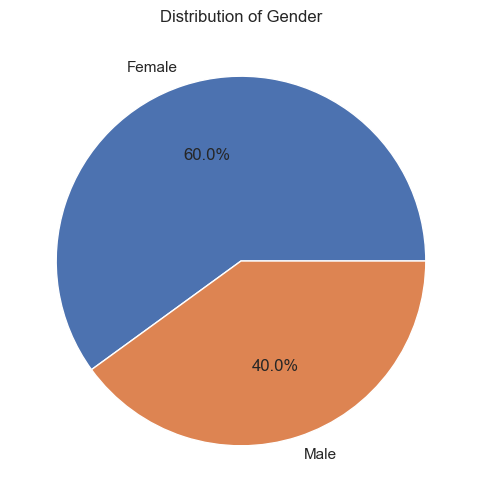

In [32]:
# Count the number of customers by gender
gender_counts = df_visualization['SEX'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.show()

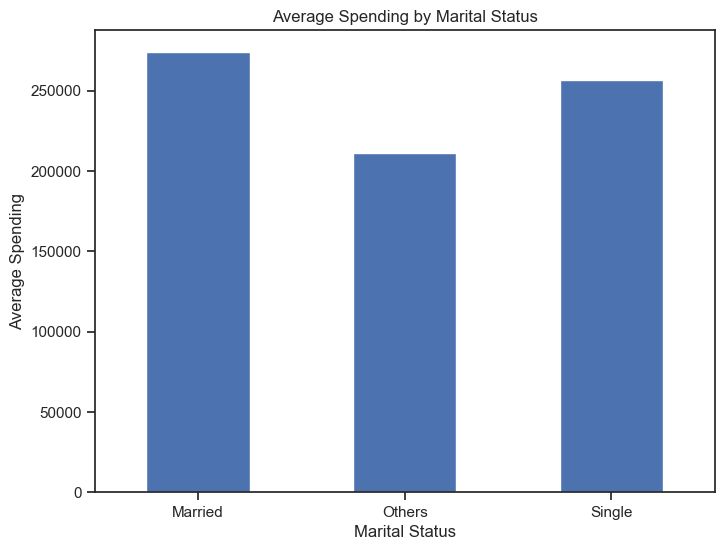

In [33]:
# Calculate average spending by marital status
avg_spending_marital = df_visualization.groupby('MARITAL')['total_spending'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_spending_marital.plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Average Spending')
plt.title('Average Spending by Marital Status')
plt.xticks(rotation=0)
plt.show()

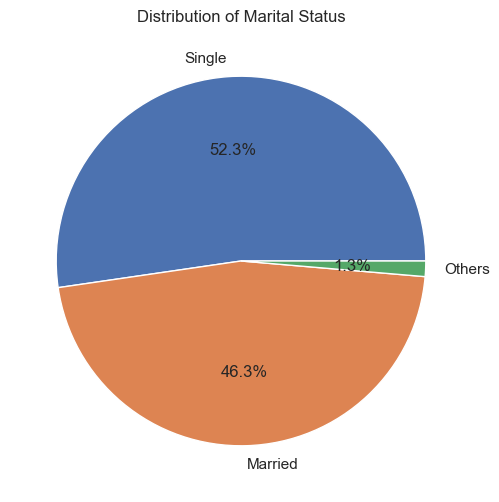

In [34]:
# Count the number of customers by marital status
marital_counts = df_visualization['MARITAL'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Marital Status')
plt.show()

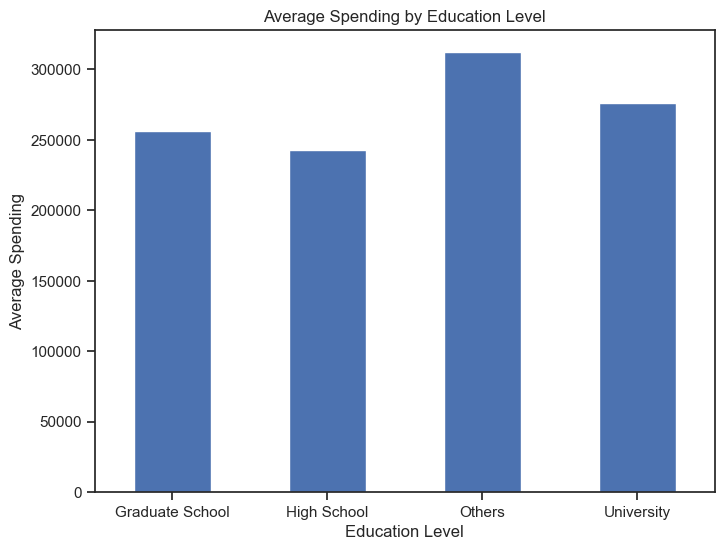

In [35]:
# Calculate average spending by education level
avg_spending_education = df_visualization.groupby('EDUCATION')['total_spending'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_spending_education.plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Average Spending')
plt.title('Average Spending by Education Level')
plt.xticks(rotation=0)
plt.show()

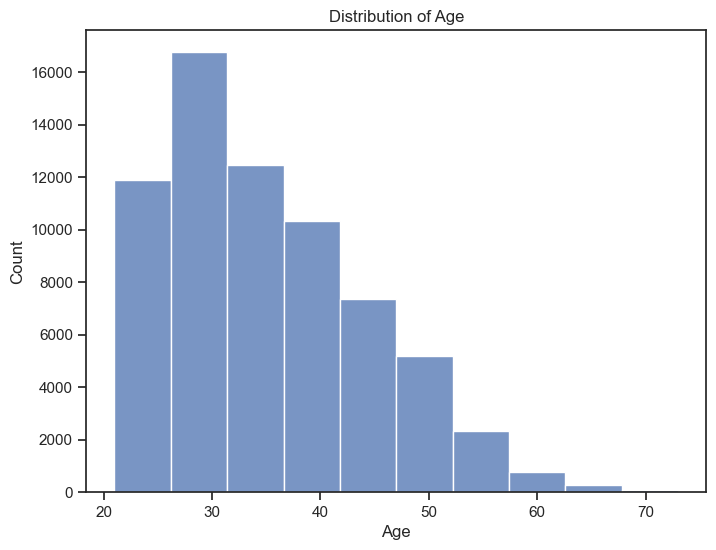

In [36]:
# Plot the histogram of age
plt.figure(figsize=(8, 6))
sns.histplot(data=df_visualization, x='AGE', bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


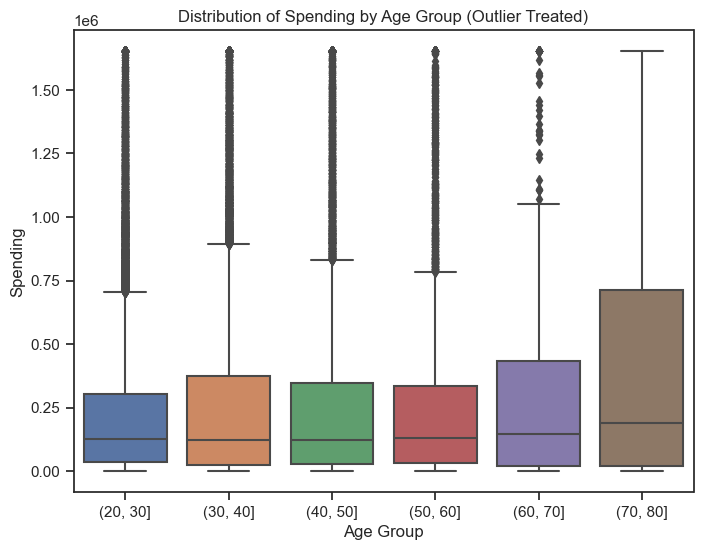

In [37]:
# Create age groups
age_groups = pd.cut(df_visualization['AGE'], bins=[20, 30, 40, 50, 60, 70, 80])

# Treat outliers in spending
spending_outliers = df_visualization['total_spending'].quantile(0.99)
df_visualization['total_spending'] = df_visualization['total_spending'].clip(upper=spending_outliers)

# Create a box plot of spending by age group
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_visualization, x=age_groups, y='total_spending')
plt.xlabel('Age Group')
plt.ylabel('Spending')
plt.title('Distribution of Spending by Age Group (Outlier Treated)')
plt.xticks(rotation=0)
plt.show()

## Visualisations to Understand the Defaulters

C:\Users\catie\AppData\Local\Temp\ipykernel_32108\1468571149.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='SEX', y='default_payment_next_month', estimator=lambda x: sum(x) / len(x) * 100, ci = None)


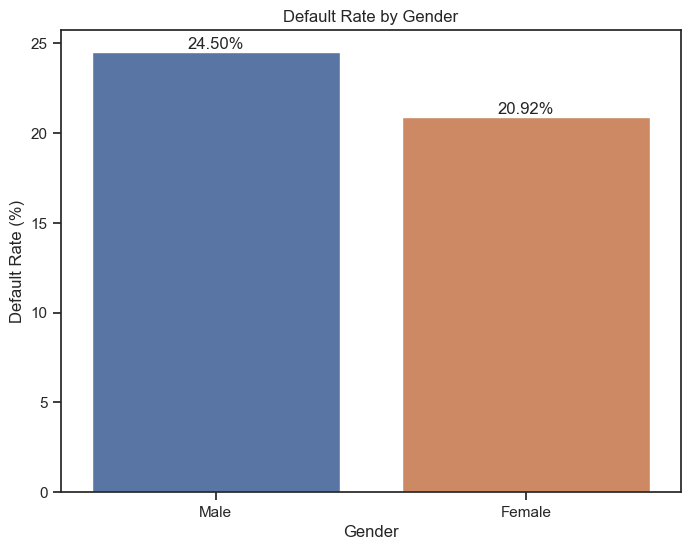

In [38]:
# Bar Chart: Default Rate by Gender
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='SEX', y='default_payment_next_month', estimator=lambda x: sum(x) / len(x) * 100, ci = None)
plt.xlabel('Gender')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Gender')
plt.xticks([0, 1], ['Male', 'Female'])

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

##### As was seen above that Males are in minority when we look at the distribution of age, their default rate is high compared to the Females. Hence, Males can be considered as a high-risk category of customer for future lendings.

C:\Users\catie\AppData\Local\Temp\ipykernel_32108\3780440652.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='EDUCATION', y='default_payment_next_month', estimator=lambda x: sum(x) / len(x) * 100, ci = None)


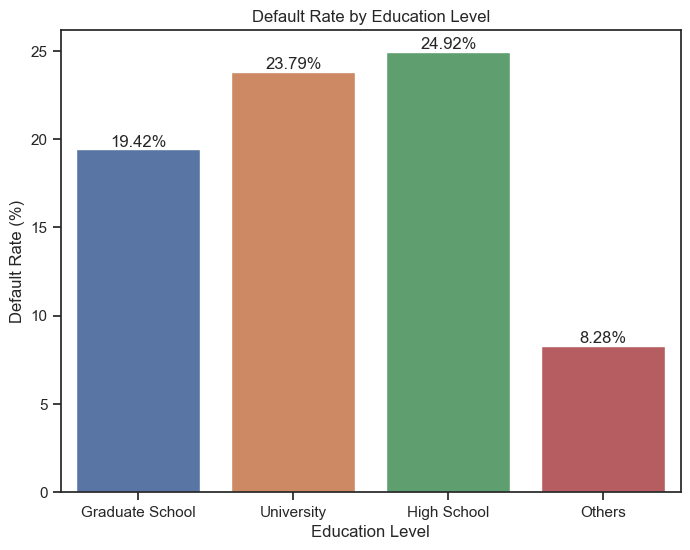

In [39]:
# Bar Chart: Default Rate by Education Level
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='EDUCATION', y='default_payment_next_month', estimator=lambda x: sum(x) / len(x) * 100, ci = None)
plt.xlabel('Education Level')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Education Level')
plt.xticks([0, 1, 2, 3], ['Graduate School', 'University', 'High School', 'Others'])

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

##### From the above visualisation it is apparent that high-schoolers are in high risk customer group. Company should be careful while extending an extensive amount of credit towards these customers.

C:\Users\catie\AppData\Local\Temp\ipykernel_32108\472825373.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='MARITAL', y='default_payment_next_month', estimator=lambda x: sum(x) / len(x) * 100, ci = None)


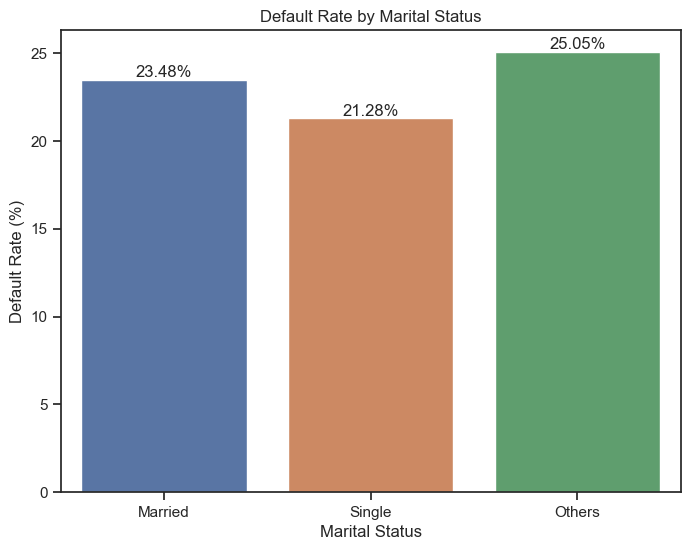

In [40]:
# Bar Chart: Default Rate by Marital Status
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='MARITAL', y='default_payment_next_month', estimator=lambda x: sum(x) / len(x) * 100, ci = None)
plt.xlabel('Marital Status')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Marital Status')
plt.xticks([0,1,2], ['Married', 'Single', 'Others'])

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

##### It is not so apparent if any of the three category can be termed as high-risk category under the Marital column, although Single customers tends to show a little less Default Rate compared to Married / Others.

C:\Users\catie\AppData\Local\Temp\ipykernel_32108\4193468298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)


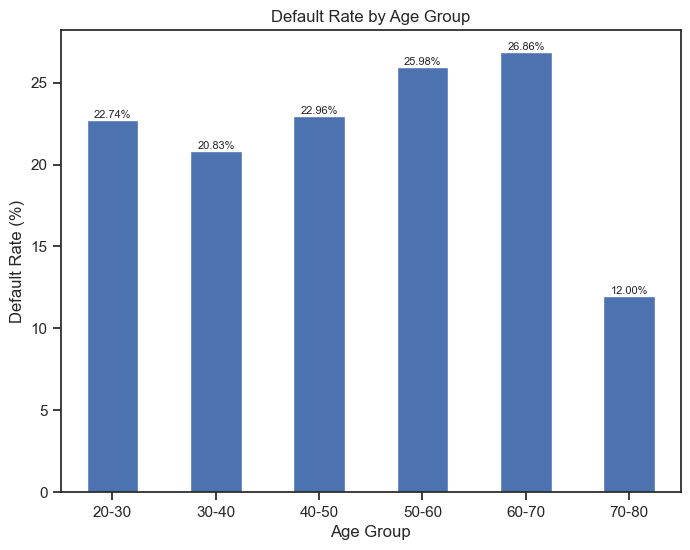

In [41]:
# Create age groups
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['age_group'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

# Calculate the default rate by age group
default_rate_age = df.groupby('age_group')['default_payment_next_month'].mean() * 100

# Plot the default rate by age group
plt.figure(figsize=(8, 6))
ax = default_rate_age.plot(kind='bar')

# Add data labels to the bar chart
for i, v in enumerate(default_rate_age):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontsize=8)

plt.xlabel('Age Group')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Age Group')
plt.xticks(rotation=0)
plt.show()

##### People in the age range of 70-80 were seen as high spenders in the previously created charts. Although, over here it can be seen that they have very little default rate compared to other age groups. Hence, more credit can be extended towards people in this age range to motivate the customers to spend at an even higher rate.